# NLP with Question Pairs (v1)

ML Sample of Natural Language Processing.

- For environment test and confirmation.

## Dataset

Quora Question Pairs
> Can you identify question pairs that have the same intent?

https://www.kaggle.com/competitions/quora-question-pairs/overview

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pd.set_option("display.max_colwidth", 80)

In [3]:
# Load Train Dataset
df_train = pd.read_csv(
    './raw_data/train.csv',
    na_filter=False
)

display(df_train.head(10))

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) d...,0
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say...,"I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone and video games?,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Motorolla DCX3400?,How do I hack Motorola DCX3400 for free internet?,0


In [4]:
# Check Dataset: mean of is_duplicate
df_train["is_duplicate"].mean()

0.369197853026293

In [5]:
# Check Dataset: interrogative questions appears more than one.
_questions = pd.Series(
    df_train["question1"].tolist() + df_train["question2"].tolist()
)

questions_counts = _questions.value_counts()

print(f"Unique question: {_questions.nunique()}")
print(f"Questions appears more than one: {(questions_counts > 1).sum()}")

Unique question: 537362
Questions appears more than one: 111873


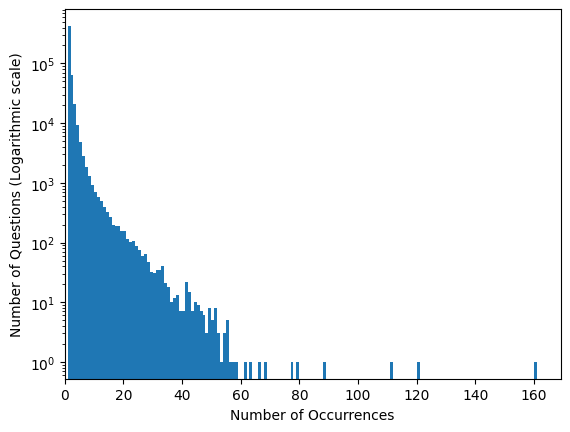

In [6]:
# Plot distribution of the number of each question occurrences
plt.hist(
    questions_counts,
    bins=range(questions_counts.max() + 1)
)
plt.xlim(xmin=0)
plt.xlabel("Number of Occurrences")
plt.ylabel("Number of Questions (Logarithmic scale)")
plt.yscale("log")
plt.show()

In [8]:
# Check Dataset: interrogative question pairs appears more than one.
df_train.duplicated(
    subset=["question1", "question2"]
).sum()

0

In [ ]:
# Check Dataset: frequent question texts
questions_counts.head()